<a href="https://colab.research.google.com/github/rheagrose/testrepo/blob/main/Version_4_of_Group_10_Rideshare_price_prediction_based_on_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## Data Loading

In [ ]:
weather_original = pd.read_csv("sample_data/weather.csv", header = 0)
cab_rides_original = pd.read_csv("sample_data/cab_rides.csv", header = 0)

In [ ]:
weather_original

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [ ]:
cab_rides_original

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [ ]:
weather_original.dtypes

temp          float64
location       object
clouds        float64
pressure      float64
rain          float64
time_stamp      int64
humidity      float64
wind          float64
dtype: object

In [ ]:
cab_rides_original.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

## Data Cleaning

In [ ]:
weather_original.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [ ]:
cab_rides_original.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [ ]:
weather_original=weather_original.fillna(weather_original['rain'].mean())

In [ ]:
weather_original=weather_original.drop('time_stamp', axis = 1)

In [ ]:
cab_rides_original=cab_rides_original.dropna(axis=0).reset_index(drop=True)

In [ ]:
weather_original

,temp,location,clouds,pressure,rain,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.122800,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.184600,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.108900,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.096900,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.178600,0.75,11.49
...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,0.057652,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,0.057652,0.96,1.54
6273,44.82,South Station,0.89,1000.70,0.057652,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,0.057652,0.96,1.54


In [ ]:
cab_rides_original=cab_rides_original.drop('id', axis = 1)
cab_rides_original=cab_rides_original.drop('product_id', axis = 1)
cab_rides_original=cab_rides_original.drop('time_stamp', axis = 1)

cab_rides_original

,distance,cab_type,destination,source,price,surge_multiplier,name
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL
...,...,...,...,...,...,...,...
637971,1.00,Uber,North End,West End,9.5,1.0,WAV
637972,1.00,Uber,North End,West End,13.0,1.0,UberXL
637973,1.00,Uber,North End,West End,9.5,1.0,UberX
637974,1.00,Uber,North End,West End,27.0,1.0,Black SUV


## Data Preprocessing


In [ ]:
weather_df = weather_original

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['temp', 'clouds', 'pressure', 'humidity', 'wind']
weather_df[numerical_cols] = scaler.fit_transform(weather_df[numerical_cols])
weather_df

,temp,location,clouds,pressure,rain,humidity,wind
0,0.552933,Back Bay,1.025341,0.287091,0.122800,0.047239,1.224049
1,0.554593,Beacon Hill,1.025341,0.287868,0.184600,-0.031297,1.243316
2,0.566218,Boston University,1.025341,0.287868,0.108900,-0.031297,1.174506
3,0.501451,Fenway,1.025341,0.286314,0.096900,0.047239,1.180011
4,0.670842,Financial District,1.025341,0.287091,0.178600,-0.109833,1.290107
...,...,...,...,...,...,...,...
6271,0.934892,North Station,0.675312,-0.602592,0.057652,1.539430,-1.454048
6272,0.956481,Northeastern University,0.643491,-0.601038,0.057652,1.539430,-1.448543
6273,0.951499,South Station,0.675312,-0.601815,0.057652,1.539430,-1.448543
6274,0.944857,Theatre District,0.675312,-0.601815,0.057652,1.539430,-1.448543


In [ ]:
avg_weather_df = weather_df.groupby('location').mean().reset_index(drop = False)
avg_weather_df

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,-0.001387,0.002084,0.000203,0.057420,0.000688,-0.006684
1,Beacon Hill,-0.007173,0.000076,0.000245,0.057572,0.008347,0.002068
2,Boston University,-0.007096,0.004639,0.001091,0.057233,-0.001564,-0.030451
3,Fenway,-0.020941,0.006647,0.000628,0.057279,0.025766,-0.025072
4,Financial District,0.053200,-0.003331,-0.000732,0.058169,-0.071841,0.015746
5,Haymarket Square,-0.003750,-0.003392,0.000002,0.057934,0.006695,0.011114
6,North End,0.000061,-0.003331,-0.000256,0.057808,0.000538,0.013846
7,North Station,-0.009160,-0.002479,-0.000186,0.057483,0.012251,0.009067
8,Northeastern University,-0.019163,0.001719,-0.000081,0.057183,0.028769,-0.014694
9,South Station,0.050422,-0.000897,-0.000558,0.057915,-0.066886,0.012699


In [ ]:
cab_rides_original['cab_type'] = cab_rides_original['cab_type'].replace({'Lyft': 0, 'Uber': 1})

cab_rides_original

,distance,cab_type,destination,source,price,surge_multiplier,name
0,0.44,0,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,0,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,0,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,0,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,0,North Station,Haymarket Square,9.0,1.0,Lyft XL
...,...,...,...,...,...,...,...
637971,1.00,1,North End,West End,9.5,1.0,WAV
637972,1.00,1,North End,West End,13.0,1.0,UberXL
637973,1.00,1,North End,West End,9.5,1.0,UberX
637974,1.00,1,North End,West End,27.0,1.0,Black SUV


## Merge the Data Frames

In [ ]:
source_weather_df= avg_weather_df.rename(
columns={
    'location':'source',
    'temp':'source_temp',
    'clouds': 'source_clouds',
    'pressure':'source_pressure',
    'rain': 'source_rain',
    'humidity':'source_humidity',
    'wind':'source_wind'
}
)
source_weather_df

,source,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,Back Bay,-0.001387,0.002084,0.000203,0.057420,0.000688,-0.006684
1,Beacon Hill,-0.007173,0.000076,0.000245,0.057572,0.008347,0.002068
2,Boston University,-0.007096,0.004639,0.001091,0.057233,-0.001564,-0.030451
3,Fenway,-0.020941,0.006647,0.000628,0.057279,0.025766,-0.025072
4,Financial District,0.053200,-0.003331,-0.000732,0.058169,-0.071841,0.015746
5,Haymarket Square,-0.003750,-0.003392,0.000002,0.057934,0.006695,0.011114
6,North End,0.000061,-0.003331,-0.000256,0.057808,0.000538,0.013846
7,North Station,-0.009160,-0.002479,-0.000186,0.057483,0.012251,0.009067
8,Northeastern University,-0.019163,0.001719,-0.000081,0.057183,0.028769,-0.014694
9,South Station,0.050422,-0.000897,-0.000558,0.057915,-0.066886,0.012699


In [ ]:
destination_weather_df= avg_weather_df.rename(
columns={
    'location':'destination',
    'temp':'destination_temp',
    'clouds': 'destination_clouds',
    'pressure':'destination_pressure',
    'rain': 'destination_rain',
    'humidity':'destination_humidity',
    'wind':'destination_wind'
}
)
destination_weather_df

,destination,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,Back Bay,-0.001387,0.002084,0.000203,0.057420,0.000688,-0.006684
1,Beacon Hill,-0.007173,0.000076,0.000245,0.057572,0.008347,0.002068
2,Boston University,-0.007096,0.004639,0.001091,0.057233,-0.001564,-0.030451
3,Fenway,-0.020941,0.006647,0.000628,0.057279,0.025766,-0.025072
4,Financial District,0.053200,-0.003331,-0.000732,0.058169,-0.071841,0.015746
5,Haymarket Square,-0.003750,-0.003392,0.000002,0.057934,0.006695,0.011114
6,North End,0.000061,-0.003331,-0.000256,0.057808,0.000538,0.013846
7,North Station,-0.009160,-0.002479,-0.000186,0.057483,0.012251,0.009067
8,Northeastern University,-0.019163,0.001719,-0.000081,0.057183,0.028769,-0.014694
9,South Station,0.050422,-0.000897,-0.000558,0.057915,-0.066886,0.012699


In [ ]:
df = cab_rides_original\
    .merge(source_weather_df, on ='source')\
    .merge(destination_weather_df, on='destination')
df

,distance,cab_type,destination,source,price,surge_multiplier,name,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,0,North Station,Haymarket Square,5.0,1.0,Shared,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114,-0.00916,-0.002479,-0.000186,0.057483,0.012251,0.009067
1,0.44,0,North Station,Haymarket Square,11.0,1.0,Lux,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114,-0.00916,-0.002479,-0.000186,0.057483,0.012251,0.009067
2,0.44,0,North Station,Haymarket Square,7.0,1.0,Lyft,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114,-0.00916,-0.002479,-0.000186,0.057483,0.012251,0.009067
3,0.44,0,North Station,Haymarket Square,26.0,1.0,Lux Black XL,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114,-0.00916,-0.002479,-0.000186,0.057483,0.012251,0.009067
4,0.44,0,North Station,Haymarket Square,9.0,1.0,Lyft XL,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114,-0.00916,-0.002479,-0.000186,0.057483,0.012251,0.009067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,0,Haymarket Square,Financial District,27.5,1.0,Lux Black XL,0.05320,-0.003331,-0.000732,0.058169,-0.071841,0.015746,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114
637972,0.99,0,Haymarket Square,Financial District,5.0,1.0,Shared,0.05320,-0.003331,-0.000732,0.058169,-0.071841,0.015746,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114
637973,0.99,0,Haymarket Square,Financial District,16.5,1.0,Lux Black,0.05320,-0.003331,-0.000732,0.058169,-0.071841,0.015746,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114
637974,0.99,0,Haymarket Square,Financial District,10.5,1.0,Lyft XL,0.05320,-0.003331,-0.000732,0.058169,-0.071841,0.015746,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114


In [ ]:
location_dummies = pd.get_dummies(df['source'], prefix='source')
merged_df = pd.concat([df, location_dummies], axis=1)

location_dummies = pd.get_dummies(merged_df['destination'], prefix='destination')
merged_df = pd.concat([merged_df, location_dummies], axis=1)

name_dummies = pd.get_dummies(merged_df['name'], prefix='name')
merged_df = pd.concat([merged_df, name_dummies], axis=1)

# Drop the original name column
merged_df.drop('name', axis=1, inplace=True)
# Drop original location columns
merged_df = merged_df.drop(['source', 'destination'], axis=1)


In [ ]:
merged_df

,distance,cab_type,price,surge_multiplier,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,0,5.0,1.0,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114,...,0,0,0,0,0,1,0,0,0,0
1,0.44,0,11.0,1.0,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114,...,1,0,0,0,0,0,0,0,0,0
2,0.44,0,7.0,1.0,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114,...,0,0,0,1,0,0,0,0,0,0
3,0.44,0,26.0,1.0,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114,...,0,0,1,0,0,0,0,0,0,0
4,0.44,0,9.0,1.0,-0.00375,-0.003392,0.000002,0.057934,0.006695,0.011114,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,0,27.5,1.0,0.05320,-0.003331,-0.000732,0.058169,-0.071841,0.015746,...,0,0,1,0,0,0,0,0,0,0
637972,0.99,0,5.0,1.0,0.05320,-0.003331,-0.000732,0.058169,-0.071841,0.015746,...,0,0,0,0,0,1,0,0,0,0
637973,0.99,0,16.5,1.0,0.05320,-0.003331,-0.000732,0.058169,-0.071841,0.015746,...,0,1,0,0,0,0,0,0,0,0
637974,0.99,0,10.5,1.0,0.05320,-0.003331,-0.000732,0.058169,-0.071841,0.015746,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
merged_df.dtypes

distance                               float64
cab_type                                 int64
price                                  float64
surge_multiplier                       float64
source_temp                            float64
source_clouds                          float64
source_pressure                        float64
source_rain                            float64
source_humidity                        float64
source_wind                            float64
destination_temp                       float64
destination_clouds                     float64
destination_pressure                   float64
destination_rain                       float64
destination_humidity                   float64
destination_wind                       float64
source_Back Bay                          uint8
source_Beacon Hill                       uint8
source_Boston University                 uint8
source_Fenway                            uint8
source_Financial District                uint8
source_Haymar

## Exploratory Data Analysis

<Axes: >

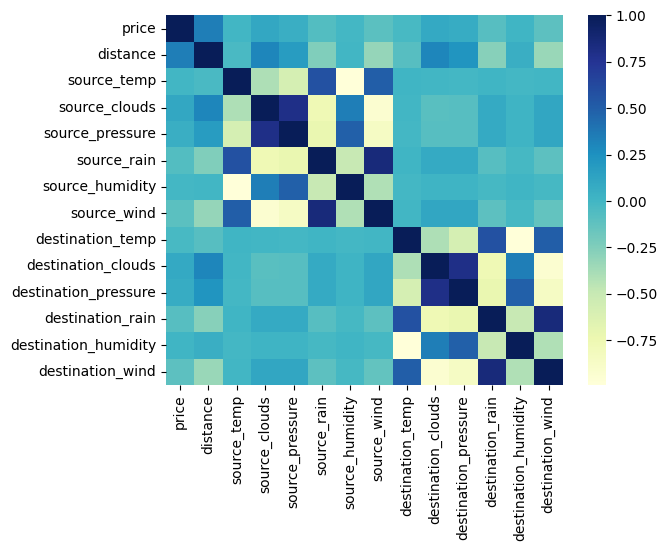

In [ ]:
import seaborn as sns
corr_matrix = merged_df[['price','distance','source_temp', 'source_clouds', 'source_pressure', 'source_rain',
       'source_humidity', 'source_wind', 'destination_temp',
       'destination_clouds', 'destination_pressure', 'destination_rain',
       'destination_humidity', 'destination_wind']].corr()


sns.heatmap(corr_matrix, cmap="YlGnBu")

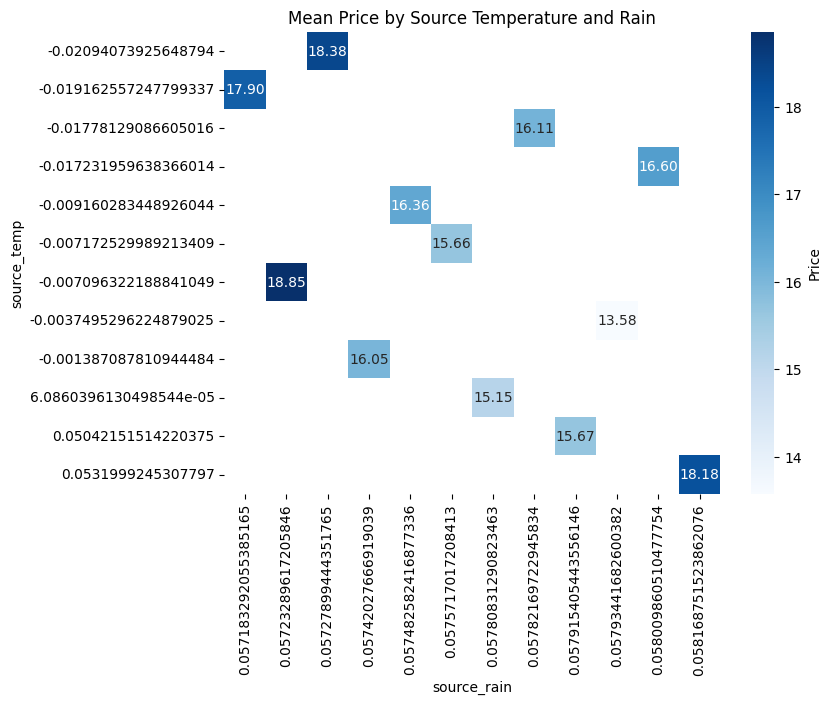

In [ ]:
import matplotlib.pyplot as plt
pivot = merged_df.pivot_table(values='price', index='source_temp', columns='source_rain', aggfunc='mean')

# create heatmap with colorbar
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='.2f', cbar_kws={'label': 'Price'})
ax.set_title('Mean Price by Source Temperature and Rain')
plt.show()

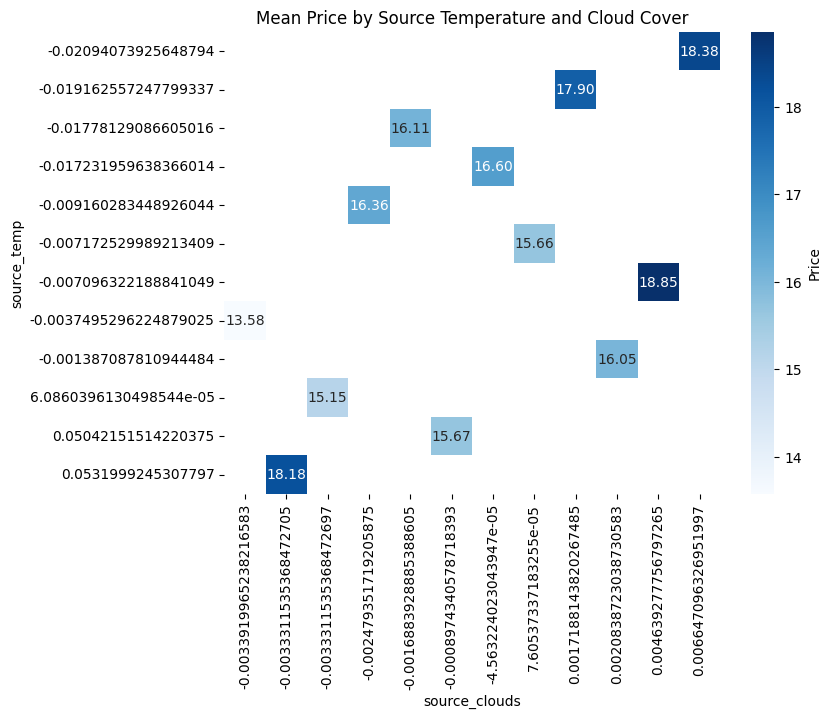

In [ ]:
# create pivot table with mean price for each combination of source_temp and source_clouds
pivot = df.pivot_table(values='price', index='source_temp', columns='source_clouds', aggfunc='mean')

# create heatmap with colorbar
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='.2f', cbar_kws={'label': 'Price'})
ax.set_title('Mean Price by Source Temperature and Cloud Cover')
plt.show()

**Predictive Data Analysis**

In [ ]:
#Split Data

from sklearn.model_selection import train_test_split

X = merged_df.drop('price', axis=1)
y = merged_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,shuffle = True, random_state=1)

Linear Regression

In [ ]:
#Train Data
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

#Make predictions
reg_pred = reg.predict(X_test)

#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
reg_mse = mean_squared_error(y_test, reg_pred)
reg_r2 = r2_score(y_test,reg_pred)
reg_mse = round(reg_mse, 2)
reg_r2 = round(reg_r2, 2)
print("MSE: ",reg_mse)
print("R-squared: ",reg_r2)

MSE:  6.25
R-squared:  0.93


In [ ]:
# coefficeints of the Linear Regression Model
print('\nCoefficient of model :', reg.coef_)

# intercept of the model
print('\nIntercept of model',reg.intercept_)


Coefficient of model : [ 2.88999162e+00  1.72063349e+11  1.84971898e+01 -1.71678830e+11
 -1.20425659e+09  1.73990153e+11  3.97323228e+11 -1.41593568e+11
 -5.14943379e+11 -1.28081692e+11  3.62845471e+11 -1.57407766e+11
  3.93005693e+11  4.25449325e+10 -1.47420404e+11  2.79630804e+10
  3.24911556e+10  5.88679152e+10  6.31952667e+10  3.84735263e+10
  8.19166732e+10  8.32007293e+10  3.64143350e+10  6.94253276e+10
  8.17218353e+10  3.73115503e+10  3.39704643e+10 -1.54907981e+11
 -1.54009039e+11 -1.15241403e+11 -1.18204081e+11 -1.40000436e+11
 -1.06569587e+11 -1.05430156e+11 -1.52503458e+11 -1.14859891e+11
 -9.72530804e+10 -1.55480685e+11 -1.55416085e+11 -1.63223929e+11
 -1.63223929e+11  8.83942024e+09  8.83942025e+09  8.83942026e+09
  8.83942023e+09  8.83942024e+09  8.83942023e+09 -1.63223929e+11
 -1.63223929e+11 -1.63223929e+11 -1.63223929e+11]

Intercept of model 22673262929.491447


Decision Tree Regressor

In [ ]:
#Train Data
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)

#Make predictions
dt_pred = dt.predict(X_test)

#Evaluation
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test,dt_pred)

dt_mse = round(dt_mse, 2)
dt_r2 = round(dt_r2, 2)
print("MSE: ", dt_mse)
print("R-squared: ", dt_r2)

MSE:  2.76
R-squared:  0.97


Random Forest Regressor

In [ ]:
#Train Data
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

#Make predictions
rf_pred = rf.predict(X_test)

#Evaluation
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test,rf_pred)
rf_mse = round(rf_mse, 2)
rf_r2 = round(rf_r2, 2)
print("MSE: ", rf_mse)
print("R-squared: ", rf_r2)

MSE:  2.68
R-squared:  0.97


Make Predictions and results

In [ ]:
#Linear Regression

reg.predict(X_test), y_test

(array([28.67497253, 16.98825836, 10.24434662, ..., 11.42598724,
        11.85915375, 20.2828598 ]),
 606015    27.5
 503810    16.5
 207240    10.5
 331602     7.0
 584694     7.0
           ... 
 443768    10.5
 401784     9.0
 519043    10.5
 438652     9.5
 328750    22.5
 Name: price, Length: 191393, dtype: float64)

In [ ]:
#Decision tree regressor

dt.predict(X_test), y_test

(array([27.        , 16.76086957, 10.46954315, ..., 10.78433269,
        10.77757353, 21.71428571]),
 606015    27.5
 503810    16.5
 207240    10.5
 331602     7.0
 584694     7.0
           ... 
 443768    10.5
 401784     9.0
 519043    10.5
 438652     9.5
 328750    22.5
 Name: price, Length: 191393, dtype: float64)

In [ ]:
#Random Forest regressor
rf.predict(X_test), y_test

(array([26.98614286, 16.78525394, 10.46913993, ..., 10.78146042,
        10.7768766 , 21.73455652]),
 606015    27.5
 503810    16.5
 207240    10.5
 331602     7.0
 584694     7.0
           ... 
 443768    10.5
 401784     9.0
 519043    10.5
 438652     9.5
 328750    22.5
 Name: price, Length: 191393, dtype: float64)

Evaluation of 3 models

In [ ]:
results = pd.DataFrame(columns=['Model', 'MSE', 'R-squared'])
results.loc[0] = ['Linear Regression', reg_mse, reg_r2] 
results.loc[1] = ['Decision Tree', dt_mse, dt_r2] 
results.loc[2] = ['Random Forest', rf_mse, rf_r2] 

print(results)

               Model   MSE  R-squared
0  Linear Regression  6.25       0.93
1      Decision Tree  2.76       0.97
2      Random Forest  2.68       0.97
